In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Enable graphical display
%matplotlib inline

In [ ]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# read the data
df = pd.read_csv('/content/foodhub_order.csv')
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
#print the Shape of the Dataset
df.shape

(1898, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
nullValues = df.isnull().sum()
print(nullValues)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [10]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [11]:
# Use of pandas statistical function to get the summary of data
print("Minimum time for food to be prepared: ",df.food_preparation_time.min())
print("Maximum time for food to be prepared: ",df.food_preparation_time.max())
print("Average time for food to be prepared: ",round(df.food_preparation_time.mean(),2))


Minimum time for food to be prepared:  20
Maximum time for food to be prepared:  35
Average time for food to be prepared:  27.37


In [12]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [13]:
df['order_id'].nunique()

1898

In [14]:
df['customer_id'].nunique()

1200

In [17]:
# plotting Customer_id using countplot
plt.figure(figsize=(200,80)) #Set the figure size
sns.countplot(data=df, x='customer_id')
plt.show()

In [19]:
pd.DataFrame(df['customer_id'].value_counts()).value_counts()

customer_id
1              784
2              267
3               83
4               33
5               19
6                6
7                4
8                1
9                1
10               1
13               1
dtype: int64

In [20]:
df['restaurant_name'].nunique()

178

In [21]:
df['cuisine_type'].nunique()

14

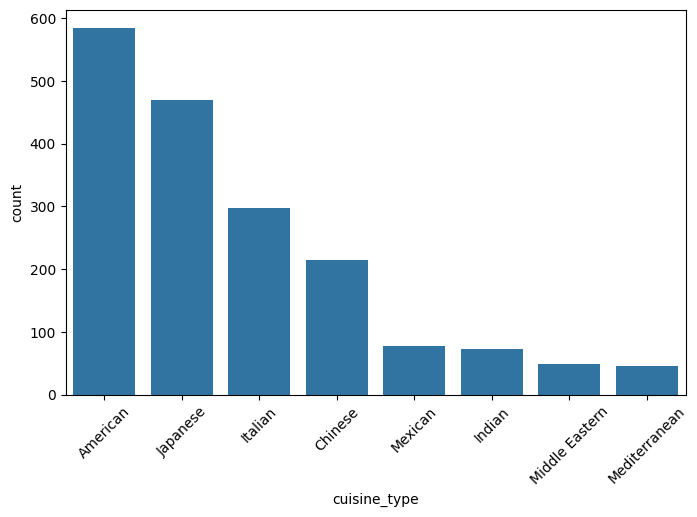

In [22]:
# plotting cuisine type using countplot
plt.figure(figsize = (8,5)) #set the figure size
sns.countplot(data = df, x = 'cuisine_type',order=df.cuisine_type.value_counts().iloc[:8].index)
plt.xticks(rotation=45)
plt.show()

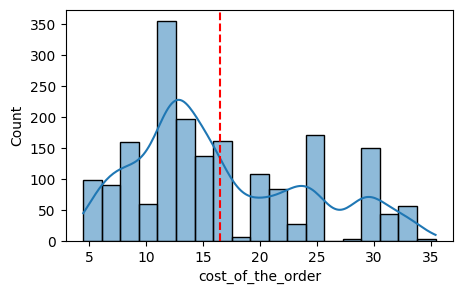

In [23]:
# plotting cost of order using histogram
plt.figure(figsize = (5,3)) #set the figure size
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.axvline(df['cost_of_the_order'].mean(),color='r',linestyle='--') #mean value of the column indicated with doted line symbol
plt.show()


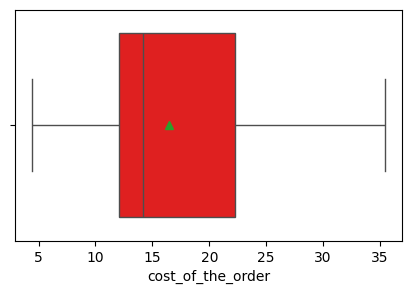

In [24]:
# plotting cost of order using boxplot
plt.figure(figsize = (5,3)) #set the figure size
sns.boxplot(data=df,x='cost_of_the_order', showmeans=True, color='red')
plt.show()

In [25]:
# Check the unique values
df['day_of_the_week'].nunique()

2

In [26]:
print('Weekends are', (round(df['day_of_the_week'].value_counts()[0])),'i.e.', round(df['day_of_the_week'].value_counts()[0]/len(df) * 100,2), '% of the day')
print('Weekdays are', (round(df['day_of_the_week'].value_counts()[1])),'i.e.',round(df['day_of_the_week'].value_counts()[1]/len(df) * 100,2), '% of the day')

Weekends are 1351 i.e. 71.18 % of the day
Weekdays are 547 i.e. 28.82 % of the day


<Axes: xlabel='day_of_the_week', ylabel='count'>

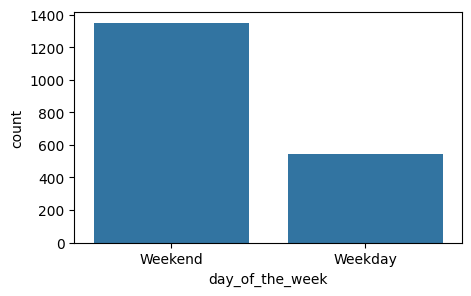

In [27]:
# plotting day of the week using countplot
plt.figure(figsize = (5,3)) #set the figure size
sns.countplot(data = df, x = 'day_of_the_week')

In [28]:
# Check the unique values
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

<Axes: xlabel='rating', ylabel='count'>

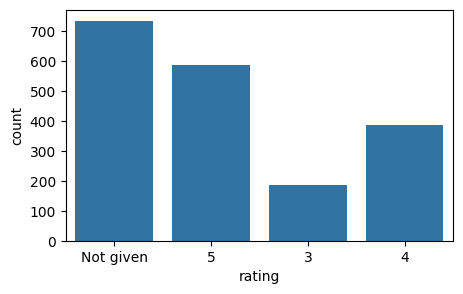

In [29]:
# plotting the order rating using countplot
plt.figure(figsize = (5,3)) #set the figure size
sns.countplot(data = df, x = 'rating')

In [30]:
print(df['rating'].value_counts())
print(round(100*df['rating'].value_counts()/len(df),2))


Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64
Not given    38.78
5            30.98
4            20.34
3             9.91
Name: rating, dtype: float64


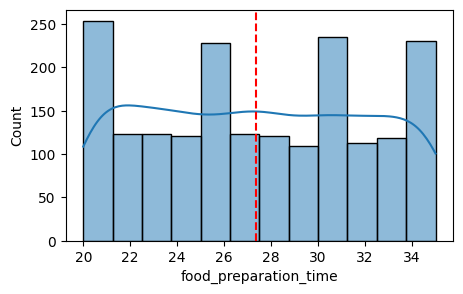

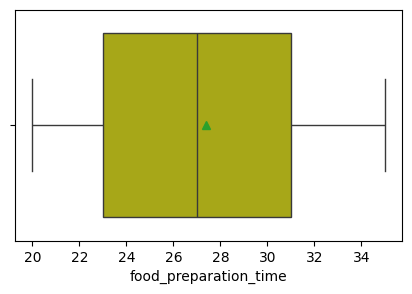

In [31]:
# plotting the time of food preparation using histogram
plt.figure(figsize = (5,3)) #set the figure size
sns.histplot(data=df, x='food_preparation_time', kde=True) #To identify pattern kde(Kernel Density Estimation) is assigned True
plt.axvline(df['food_preparation_time'].mean(),color='r',linestyle='--') #mean value of the column indicated with doted line symbol
plt.show()
plt.figure(figsize = (5,3)) #set the figure size
# plotting food_preparation_time using boxplot
sns.boxplot(data=df,x='food_preparation_time', showmeans=True, color='y') #mean value is showing with a symbol
plt.show()

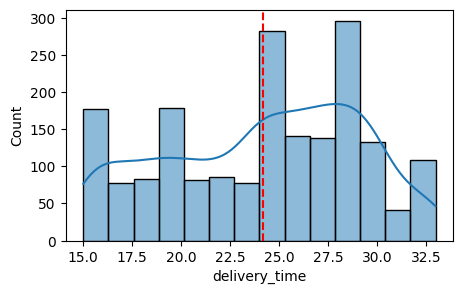

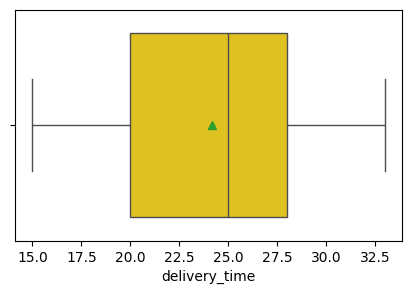

In [32]:
# plotting the time of food preparation using histogram
plt.figure(figsize = (5,3)) #set the figure size
sns.histplot(data=df, x='delivery_time', kde=True) #To identify pattern kde(Kernel Density Estimation) is assigned True
plt.axvline(df['delivery_time'].mean(),color='r',linestyle='--') #mean value of the column indicated with doted line symbol
plt.show()
plt.figure(figsize = (5,3)) #set the figure size
# plotting food_preparation_time using boxplot
sns.boxplot(data=df,x='delivery_time', showmeans=True, color='gold') #mean value is showing with a symbol
plt.show()

In [33]:
# Count the specific column data with values and by default return first five observations with head function
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [34]:
# Count the values of cuisine type by filtering weekend days
df[df['day_of_the_week']=="Weekend"].groupby('day_of_the_week')['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean             11
                 Southern           11
                 Spanish            11
                 Vietnamese          4
Name: cuisine_type, dtype: int64

In [35]:
from pandas._libs.tslibs import normalize_i8_timestamps
# Calculate the total number of orders
TO=df['cost_of_the_order'].count()
# Calculate the number of orders cost more than 20 dollars
cost20=df['cost_of_the_order'][df['cost_of_the_order']>20].count()
#calculate the percentage
print("The orders cost more than 20 dollars is {0} percent".format(round((100*cost20/TO),2)))

The orders cost more than 20 dollars is 29.24 percent


In [36]:
# Count the average order delivery time using pandas mean() function
print("Average order delivery time {0} minutes ".format(round(df['delivery_time'].mean(),2)))

Average order delivery time 24.16 minutes 


In [37]:
# Count the number of orders the top 3 customers have been placed
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

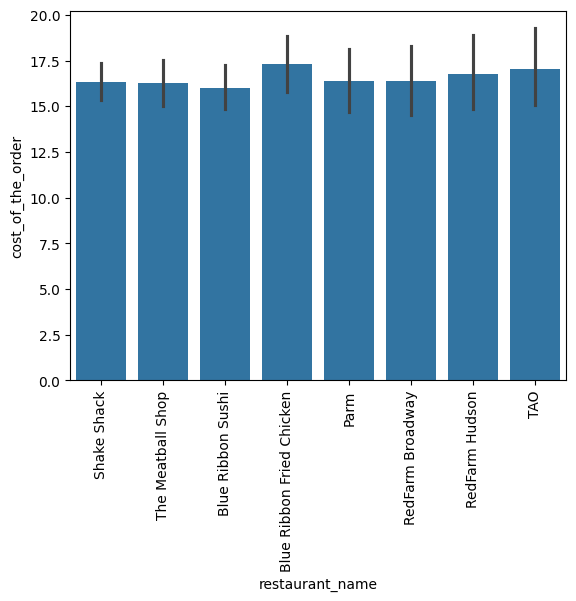

In [38]:
# plt.figure(figsize = (15,8))
sns.barplot(data = df, x = 'restaurant_name', y = 'cost_of_the_order',
            order = df.restaurant_name.value_counts().iloc[:8].index)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='cuisine_type', ylabel='count'>

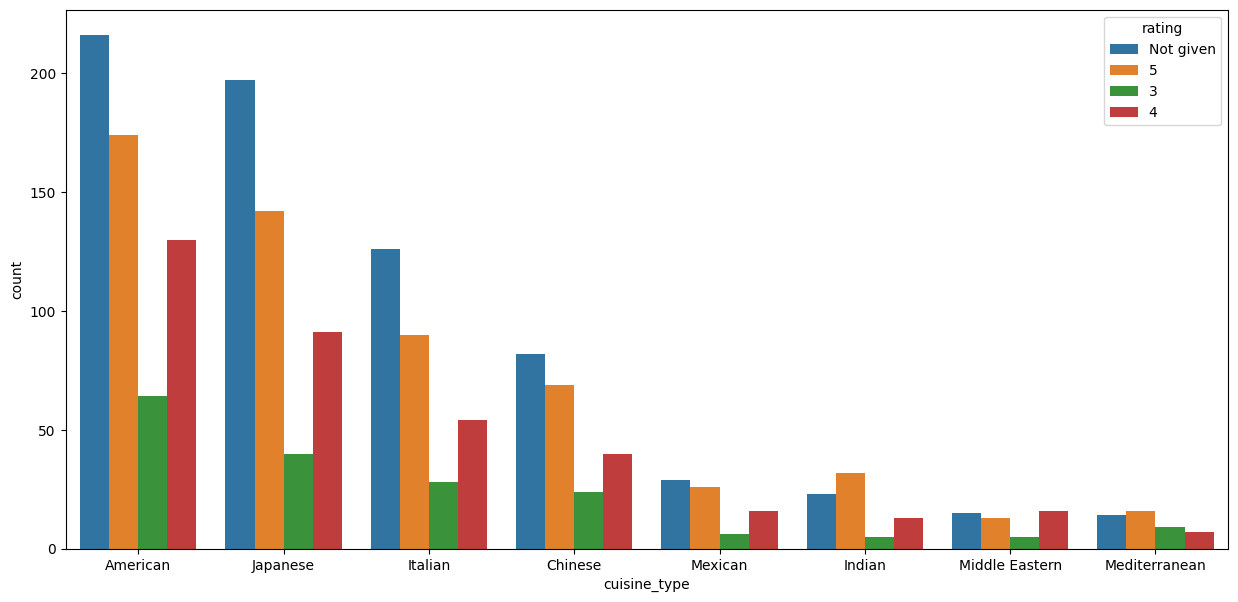

In [39]:
# Relationship between cuisine type and rating
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'cuisine_type', hue = 'rating', order = df.cuisine_type.value_counts().iloc[:8].index) #hue is used to group the data based on rating

<Figure size 2500x1000 with 0 Axes>

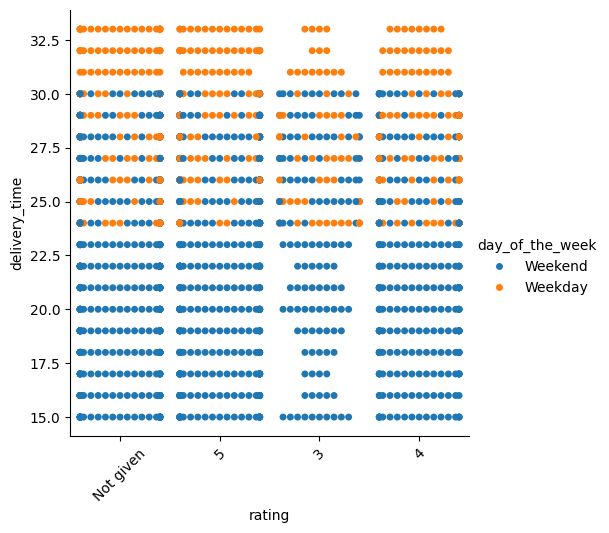

In [40]:
# Relationship between rating, delivery time and day of the week
plt.figure(figsize = (25,10))
#Swarm plot used for categorical data
sns.catplot(data=df, x='rating', y='delivery_time', hue="day_of_the_week", kind="swarm") # hue is used to group the data based on day of the week
plt.xticks(rotation=45)
plt.show()

<Figure size 2000x700 with 0 Axes>

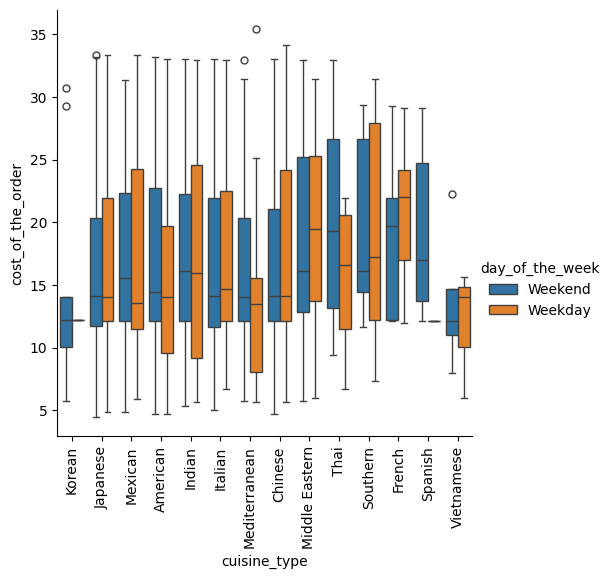

In [41]:
# Relationship between cost of order, cuisine type and day of the week
plt.figure(figsize = (20,7))
sns.catplot(data=df, x="cuisine_type", y="cost_of_the_order", hue="day_of_the_week",kind="box") # hue is used to group the data based on day of the week
plt.xticks(rotation=90)
plt.show()

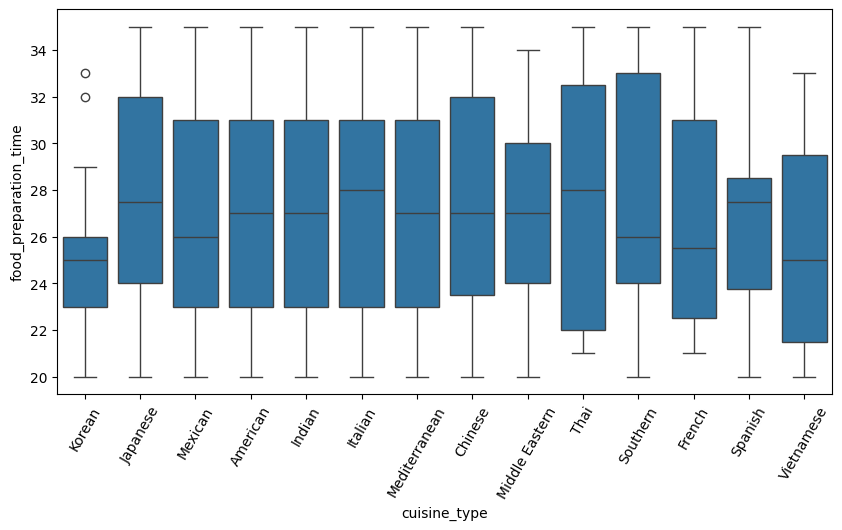

In [42]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="cuisine_type", y="food_preparation_time")
plt.xticks(rotation = 60)
plt.show()

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

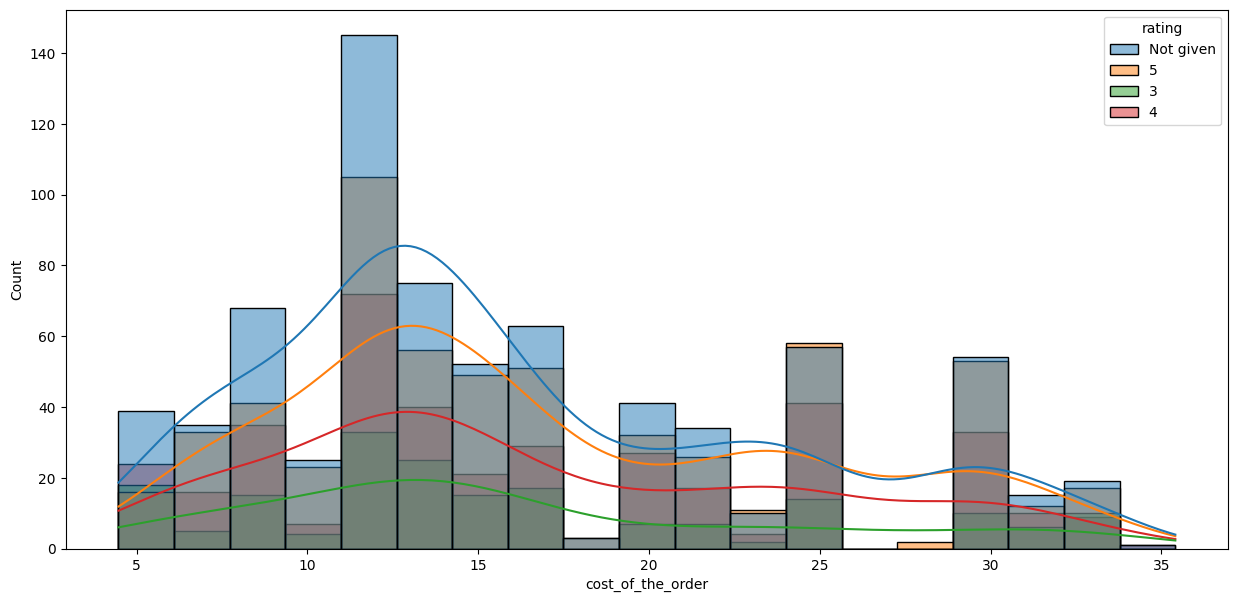

In [43]:
# Relationship between cost of the order and rating
plt.figure(figsize = (15,7)) #set the figure size
sns.histplot(data = df, x = 'cost_of_the_order', hue = 'rating', kde = True) #To identify pattern kde(Kernel Density Estimation) assigned True and hue is used to group the data based on day of the week

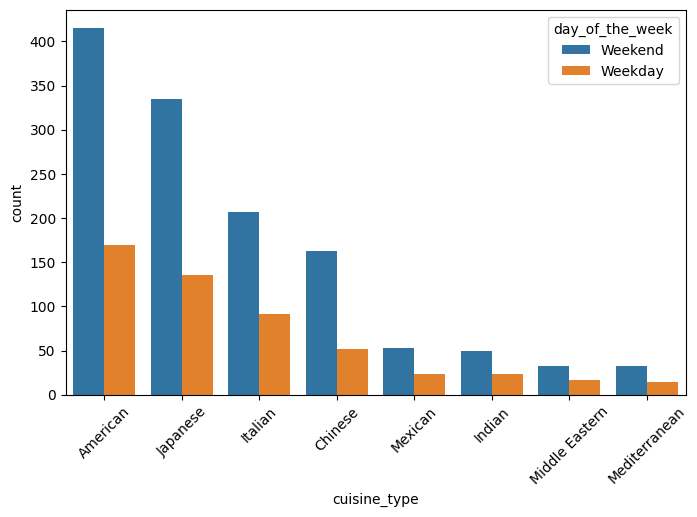

In [44]:
# plotting cuisine type and day of the week using countplot
plt.figure(figsize = (8,5)) #set the figure size
sns.countplot(data = df, x = 'cuisine_type',hue='day_of_the_week',order=df.cuisine_type.value_counts().iloc[:8].index) # hue is used to group the data based on day of the week
plt.xticks(rotation=45)
plt.show()

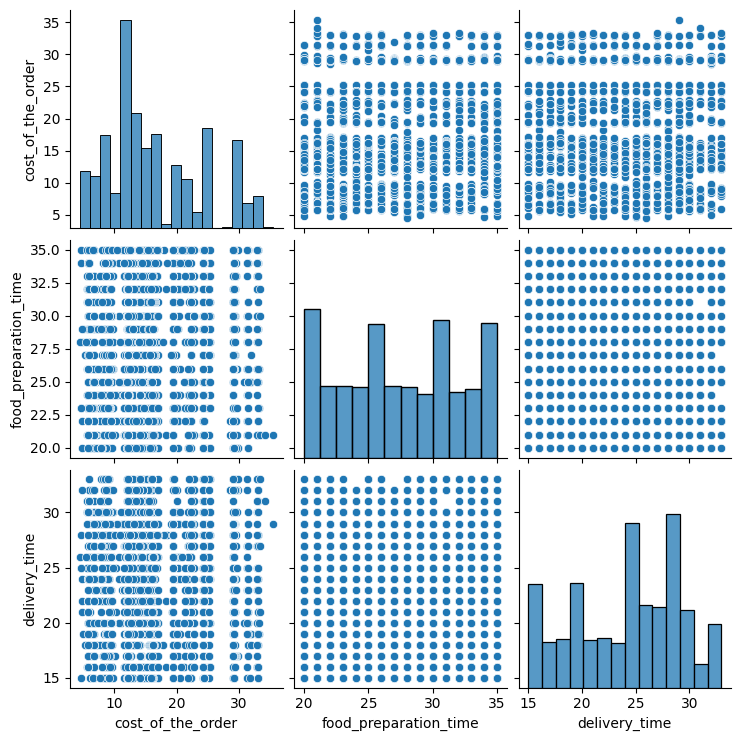

In [45]:
# Relationship among numeric values
sns.pairplot(data = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])

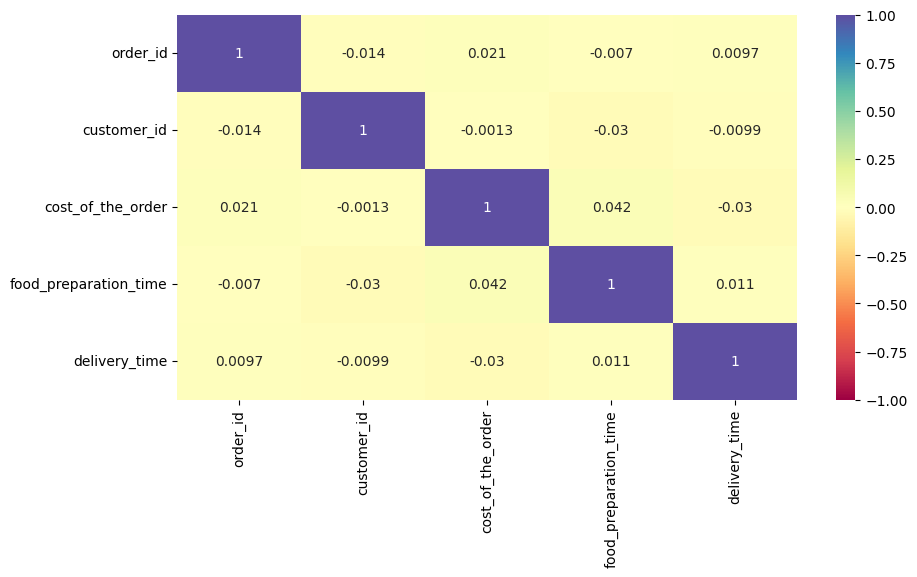

In [46]:
# Correlation using heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

In [47]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [48]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']  # get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() # Complete the code to find the mean rating

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


In [49]:
# Define a function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

# Call the defined compute_rev function to get the revenue and calculate the total revenue using sum function
print('The net revenue is around', round(df['cost_of_the_order'].apply(compute_rev).sum(), 2), 'dollars')

The net revenue is around 6166.3 dollars


In [50]:
# Create a column with the total time of food preparation and delivery
df['total_time']=df['food_preparation_time']+df['delivery_time']
# Count the orders those take more than 60 minutes to deliver
Order_60=df['total_time'][df['total_time']>60].count()
#Count the percentage of orders take more than 60 minutes to deliver
print("{0} percent of orders take more than 60 minutes to deliver".format(round(100*Order_60/df['total_time'].count(),2)))

10.54 percent of orders take more than 60 minutes to deliver


In [51]:
# Calculate mean delivery time based on the day of the week
m_del_time=df.groupby('day_of_the_week')['delivery_time'].agg(['mean'])
m_del_time

,mean
day_of_the_week,
Weekday,28.340037
Weekend,22.470022
